In [101]:
!pip install spacy
!pip install newsapi-python
!pip install wordcloud
!python -m spacy download en_core_web_lg

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


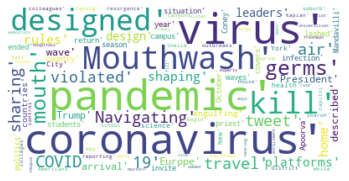

In [110]:
import spacy
import pandas as pd
from newsapi import NewsApiClient
from collections import Counter
import pickle
import string
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#grabs articles using the NewsAPI
def get_articles():
    return newsapi.get_everything(q='coronavirus', language='en', from_param='2020-10-04', to='2020-11-03', sort_by='relevancy', page=1)

#saves gathered data on disk in case something goes wrong. This project was originally done in jupyter Notebook
def save_data():
    filename = 'articlesCOVID.pckl'
    pickle.dump(articles, open(filename, 'wb'))
    filename = 'articlesCOVID.pckl'
    loaded_model = pickle.load(open(filename, 'rb'))
    filepath = 'articlesCOVID.pckl'
    pickle.dump(loaded_model, open(filepath, 'wb'))
    
#creates a dataframe from the data gotten from NewsAPI. Cleaned data to only include articles, title, publish date, description, and content
def make_dataframe(articles):
    i = 0
    dados = []
    titles = []
    dates = []
    descriptions = [] 

    for x in articles['articles']:
        titles.append(x['title'])
        dates.append(x['publishedAt'])
        descriptions.append(x['description'])
        dados.append({'title':titles[i], 'date':dates[i], 'desc':descriptions[i], 'content':x['content']})
        i += 1
    
    df = pd.DataFrame(dados)
    df = df.dropna()
    df.head()
    return df

#gathers VERB,NOUN,and PROPERNOUNs from the article into an array 
def get_keywords_eng(content):
    result = []
    pos_tag = ['VERB', 'NOUN', 'PROPN']
    for token in nlp_eng(content):
        if (token.text in nlp_eng.Defaults.stop_words or token.text in string.punctuation):
            continue
        if (token.pos_ in pos_tag):
            result.append(token.text)        
    return result

#makes the wordcloud/data visualization
def make_word_cloud(results):
    text = str(results)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
nlp_eng = spacy.load('en_core_web_lg')
newsapi = NewsApiClient(api_key='my-api-key')
articles = get_articles()
save_data()
df = make_dataframe(articles)

#apppends the keywords to the dataframe
results = []
for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

df['keywords'] = results
make_word_cloud(results)
df.to_csv('dataFrame.csv')
